### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is "Congruent words" or "Incongruent words". <br> The dependent variable is the "time" taken by the participants to name the ink colour.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothesis (H0): There is no difference in the mean time taken to read congruent and incongruent words. <br>
Alternative Hypothesis (H1): There is a difference in the mean time taken to read congruent and incongruent words. <br>
H0 : μc = μi (μc:population mean for congruent condition, μi: population mean for incongruent condition) <br>
H1 : μc ≠ μi <br> <br> 
The statistical test i will use is "Dependent Paired t-test"

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
# Perform the analysis here
# Import packages
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#read the csv file
df = pd.read_csv ('stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [7]:
#return useful descriptive statistics for each column of data 
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The previous results show that mean as a measure of central tendency, as well as standard deviation (std) as a measure of variabilty. Also the interquatile range can be calculated to be about 4.4 for congruent data set and 5.3 for the incongruent data set. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

C:\Program1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


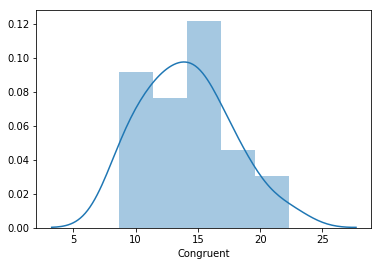

In [13]:
# plot a curve for congruent data set
sns.distplot(df['Congruent']);

C:\Program1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


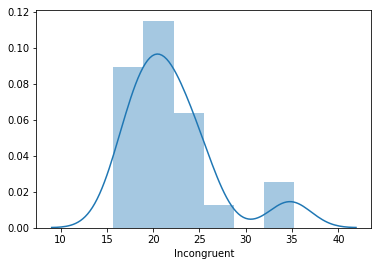

In [14]:
# plot a curve for incongruent data set
sns.distplot(df['Incongruent']);

C:\Program1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


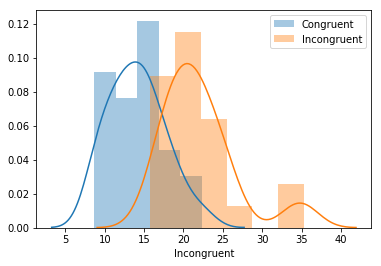

In [16]:
#Compare both datasets in one graph
sns.distplot(df['Congruent'],label = "Congruent")
sns.distplot(df['Incongruent'],label = "Incongruent")
plt.legend();

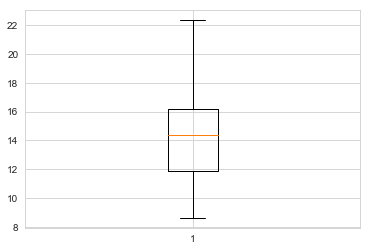

In [24]:
plt.boxplot(df['Congruent']);

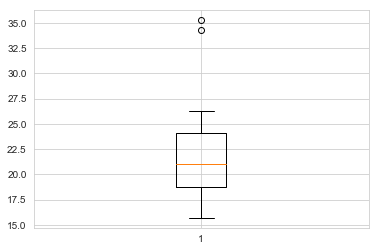

In [25]:
plt.boxplot(df['Incongruent']);

The resulting curves show that both data sets have an almost normal distrubtion pattern. It also shows that both data sets have different means and different variance. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [34]:
# calulate the critical t at 95% confidence interval
# degree of freedom is 23 
ct = t.ppf(0.975,23)
ct

2.0686576104190406

In [35]:
#find the diffenence between the two data sets
df['difference'] = df['Congruent'] - df['Incongruent']
df

,Congruent,Incongruent,difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


In [37]:
# calculate mean of the difference data set
c_mean = df['Congruent'].mean()
i_mean = df['Incongruent'].mean()
s_mean = c_mean - i_mean
s_mean

-7.964791666666665

In [38]:
#calculate the standard deviation of the difference data set
s_std = df['difference'].std()
s_std

4.864826910359056

In [40]:
# Calculate the t-value
t_value = s_mean/(s_std/math.sqrt(24))
t_value

-8.020706944109955

Two Tailed t test at a confidence interval of 95 % <br>
Sample size(n) = 24 <br>
Degree of Freedom(df) = 24-1 = 23 <br>
t-critical = 2.0686 <br>
Standerd Deviation(SD) = 4.8648 <br>
Mean of difference data = -7.9648 <br>
calculated t-value = -8.0207 <br> 
since the calculated t-value is greater than the t-critical, then reject the null hypothesis , there is a significant difference between the time of the two groups.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

According to what I read to understand that effect. It could be explained by 2 theories: <br>
Speed of Processing Theory: the interference occurs because words are read faster than colors are named. <br>
Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.<3>

The Selective Attention Theory suggests that color recognition, as opposed to reading a word, requires more attention. The brain needs to use more attention to recognize a color than to encode a word, so it takes a little longer. <br>
A variant of the stroop test in the reverse stroop test  or the numerical stroop effect. 


resources use:
https://faculty.washington.edu/chudler/words.html
https://en.wikipedia.org/wiki/Stroop_effect
https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/
https://seaborn.pydata.org/generated/seaborn.distplot.html
https://scipy.github.io/devdocs/generated/scipy.stats.t.html